In [1]:
# import packages
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
wnl = WordNetLemmatizer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# read text
# transform text data into the formatted data that Python can handle

DF_text = pd.read_csv("5_text.csv",encoding = "ISO-8859-1").astype(str)
DF_text = DF_text.dropna()
DF_text.head()
host_about=''
for index,row in DF_text.iterrows():
    host_about += row['host_about']
token_host_about=nltk.word_tokenize(host_about)

description=''
for index,row in DF_text.iterrows():
    description += row['description']
token_description=nltk.word_tokenize(description)

In [3]:
df_comments = pd.read_csv("3_comment.csv",encoding = "ISO-8859-1").astype(str)
df_comments = df_comments.dropna()
comments=''
for index,row in df_comments.iterrows():
    comments += row['comments']
df_comments.head()
comments_host_about=nltk.word_tokenize(comments)

In [4]:
# clean text that is meaningless
string_punctuation = string.punctuation
cachedStopWords = stopwords.words("english")
cachedStopWords.append('the')
ignoreChar=['The','.','I','room','will','?',' ',"'s",'!',',','<','br','/','>',"b","r","br","etc",'and','to','the','hong kong','things','Hi','\x80','hong','kong','Hong Kong','Hong','Kong','/b','many',]
nums=['0','1','2','3','4','5','6','7','8','9']

In [5]:
# generate text dataset that has been cleaned
host_word=[]
for c in token_host_about:
    if c not in string.punctuation:
        if c not in nums:
            if c not in ignoreChar:
                if c not in cachedStopWords:
                    host_word.append(c)
host_filtered=' '.join(host_word)

description_word=[]
for c in token_description:
    if c not in string.punctuation:
        if c not in nums:
            if c not in ignoreChar:
                if c not in cachedStopWords:
                    description_word.append(c)
description_filtered=' '.join(description_word)

comments=[]
for c in comments_host_about:
    if c not in string.punctuation:
        if c not in nums:
            if c not in ignoreChar:
                if c not in cachedStopWords:
                    comments.append(c)
comments_filtered=' '.join(comments)

In [6]:
# count frequency, and then output excel and graphs 
wc = {}
for word in host_word:
    if word in wc.keys():
        wc[word]+=1
    else:
        wc[word] =1
wordfre = sorted(wc.items(),key=lambda item:item[1])
df_wordfre = pd.DataFrame(wordfre)
df_wordfre.to_csv('host_about.csv',index=False)

wc2 = {}
for word in description_word:
    if word in wc2.keys():
        wc2[word]+=1
    else:
        wc2[word] =1
wordfre2 = sorted(wc2.items(),key=lambda item:item[1])
df_wordfre2 = pd.DataFrame(wordfre)
df_wordfre2.to_csv('description_about.csv',index=False)

wc3 = {}
for word in comments:
    if word in wc3.keys():
        wc3[word]+=1
    else:
        wc3[word] =1
wordfre2 = sorted(wc3.items(),key=lambda item:item[1])
df_wordfre2 = pd.DataFrame(wordfre)
df_wordfre2.to_csv('comments.csv',index=False)

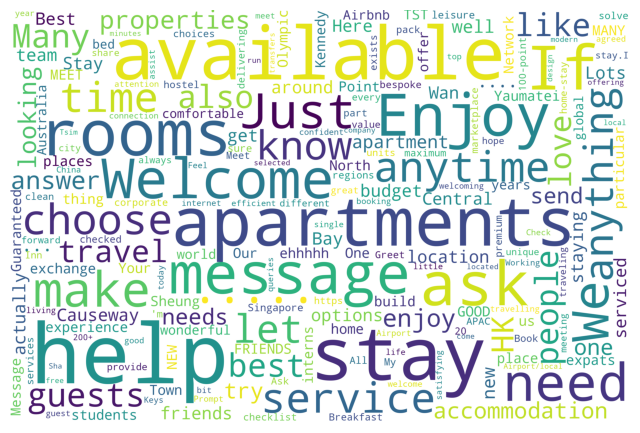

In [7]:
# fraw wordcloud

wordcloud = WordCloud(background_color = 'white',width = 3000, height = 2000,max_font_size = 400).generate_from_frequencies(wc).to_file('host_about.png')
plt.figure(figsize=(8,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

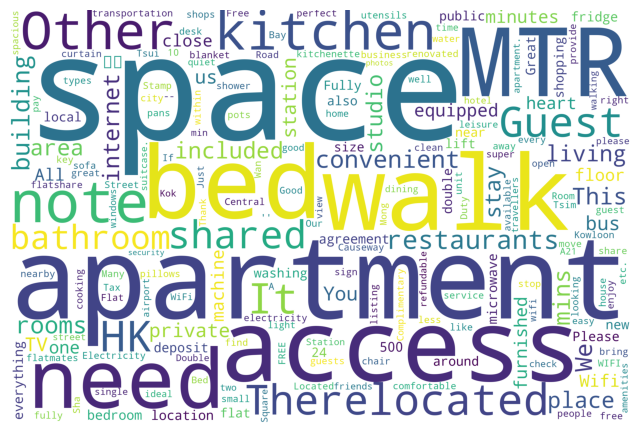

In [8]:
wordcloud = WordCloud(background_color = 'white',width = 3000, height = 2000).generate_from_frequencies(wc2).to_file('host_description.png')
plt.figure(figsize=(8,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

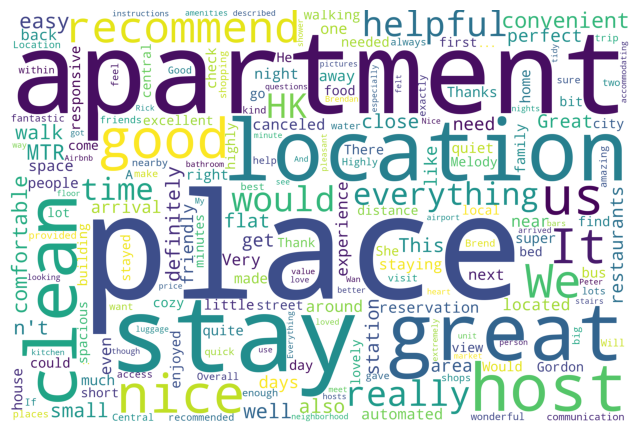

In [9]:
wordcloud = WordCloud(background_color = 'white',width = 3000, height = 2000).generate_from_frequencies(wc3).to_file('comment.png')
plt.figure(figsize=(8,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [10]:
import pandas as pd
import numpy as np

df_comments = pd.read_csv("3_comment.csv",encoding = "ISO-8859-1").astype(str)
df_comments = df_comments.dropna()

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# rating for comments
df_comments['polarity_value']="Default"
df_comments['neg']=0.0
df_comments['pos']=0.0
df_comments['neu']=0.0
df_comments['compound']=0.0

for index,row in df_comments.iterrows():
    segement = sid.polarity_scores(row['comments'])
    df_comments.at[index,'polarity_value'] = segement
    df_comments.at[index,'neg'] = segement['neg']
    df_comments.at[index,'pos'] = segement['pos']
    df_comments.at[index,'neu']= segement['neu']
    df_comments.at[index,'compound'] = segement['compound']


df_comments.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound
0,17891.0,37352.0,40291,76132,Tamara,The apartment on Holly wood Rd was exactly as ...,"{'neg': 0.061, 'neu': 0.704, 'pos': 0.235, 'co...",0.061,0.235,0.704,0.9081
1,17891.0,76243.0,40399,163312,Angela,We loved staying here for the weekend. The apa...,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.000,0.305,0.695,0.9645
2,17891.0,93590.0,40430,148333,Jennifer,An awesome loft that looks just like it does i...,"{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'comp...",0.000,0.314,0.686,0.9732
3,17891.0,108082.0,40450,218702,Matt,"Candace was great, she prepared the loft with ...","{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou...",0.000,0.250,0.750,0.9652
4,17891.0,128752.0,40479,52335,Alexander,Candace's loft was even more amazing than I ex...,"{'neg': 0.051, 'neu': 0.571, 'pos': 0.378, 'co...",0.051,0.378,0.571,0.9475


In [11]:
# cout the range of rating
df_pospoint=df_comments[['pos']]
df_pospoint=df_pospoint.groupby(pd.cut(df_pospoint["pos"], np.arange(0, 1.1, 0.1))).count()
df_pospoint=df_pospoint.rename(columns={'pos':'count_of_Comments'})
df_pospoint=df_pospoint.reset_index()
df_pospoint=df_pospoint.rename(columns={'pos':'range_i'})
for i,r in df_pospoint.iterrows():
    df_pospoint.at[i,'RANGE'] = float(str(r['range_i'])[1:4].replace(',',''))
    df_pospoint.at[i,'Sentiment'] = 'positive'
del df_pospoint['range_i']
df_pospoint.head()

,count_of_Comments,RANGE,Sentiment
0,211,0.0,positive
1,1056,0.1,positive
2,1652,0.2,positive
3,1260,0.3,positive
4,847,0.4,positive


In [12]:
df_negpoint=df_comments[['neg']]
df_negpoint=df_negpoint.groupby(pd.cut(df_comments["neg"], np.arange(0, 1.1, 0.1))).count()
df_negpoint=df_negpoint.rename(columns={'neg':'count_of_Comments'})
df_negpoint=df_negpoint.reset_index()
df_negpoint=df_negpoint.rename(columns={'neg':'range_i'})
for i,r in df_negpoint.iterrows():
    df_negpoint.at[i,'RANGE'] = float(str(r['range_i'])[1:4].replace(',',''))
    df_negpoint.at[i,'Sentiment'] = 'negative'
del df_negpoint['range_i']
for i,r in df_negpoint.iterrows():
    df_pospoint=df_pospoint.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
df_pospoint.head()

C:\Users\Jimmy\AppData\Local\Temp\ipykernel_7016\3392332673.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pospoint=df_pospoint.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
C:\Users\Jimmy\AppData\Local\Temp\ipykernel_7016\3392332673.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pospoint=df_pospoint.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
C:\Users\Jimmy\AppData\Local\Temp\ipykernel_7016\3392332673.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pospoint=df_pospoint.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
C:\Users\Jimmy\A

,count_of_Comments,RANGE,Sentiment
0,211,0.0,positive
1,1056,0.1,positive
2,1652,0.2,positive
3,1260,0.3,positive
4,847,0.4,positive


In [13]:
    
df_neupoint=df_comments[['neu']]
df_neupoint=df_neupoint.groupby(pd.cut(df_comments["neu"], np.arange(0, 1.1, 0.1))).count()
df_neupoint=df_neupoint.rename(columns={'neu':'count_of_Comments'})
df_neupoint=df_neupoint.reset_index()
df_neupoint=df_neupoint.rename(columns={'neu':'range_i'})
for i,r in df_neupoint.iterrows():
    df_neupoint.at[i,'RANGE'] = float(str(r['range_i'])[1:4].replace(',',''))
    df_neupoint.at[i,'Sentiment'] = 'netual'
del df_neupoint['range_i']
for i,r in df_neupoint.iterrows():
    df_pospoint=df_pospoint.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)

df_pospoint.head()

C:\Users\Jimmy\AppData\Local\Temp\ipykernel_7016\458685258.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pospoint=df_pospoint.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
C:\Users\Jimmy\AppData\Local\Temp\ipykernel_7016\458685258.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pospoint=df_pospoint.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
C:\Users\Jimmy\AppData\Local\Temp\ipykernel_7016\458685258.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pospoint=df_pospoint.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
C:\Users\Jimmy\AppD

,count_of_Comments,RANGE,Sentiment
0,211,0.0,positive
1,1056,0.1,positive
2,1652,0.2,positive
3,1260,0.3,positive
4,847,0.4,positive


<Figure size 1000x1000 with 0 Axes>

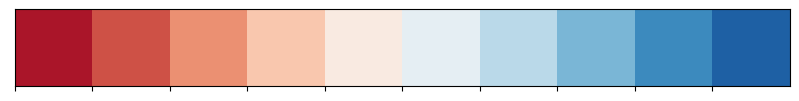

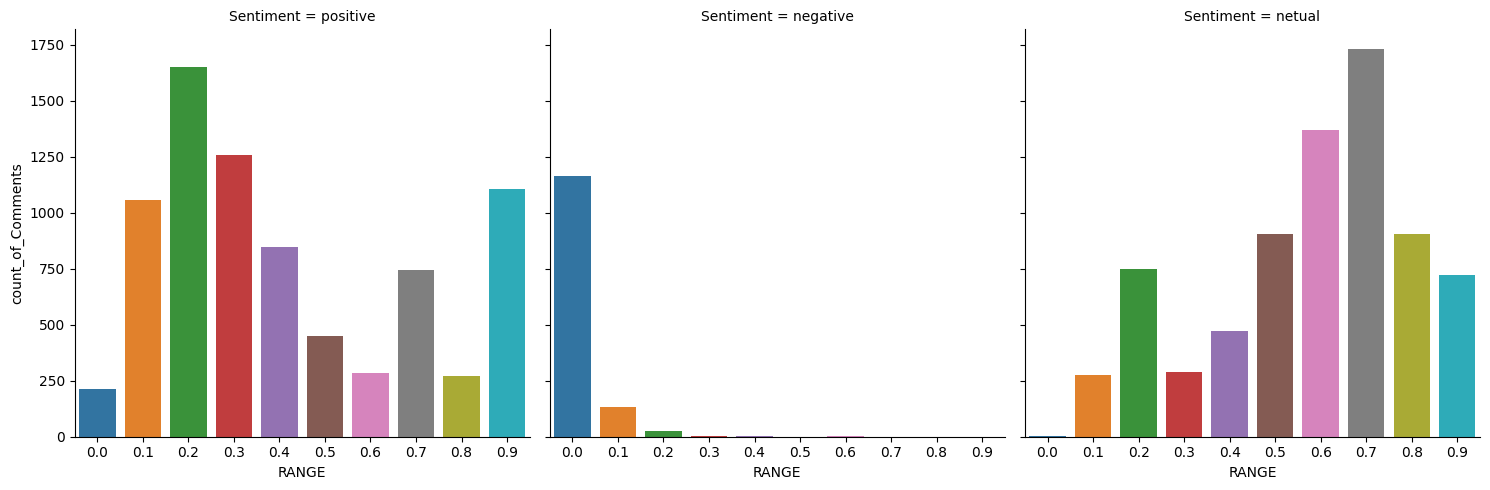

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# output excel
df_comments.to_csv('sentiment.csv')

# draw the graph of distribution
plt.figure(figsize=(10,10))
diverging_colors = sns.color_palette("RdBu", 10)
sns.palplot(diverging_colors)
sns.catplot(data=df_pospoint, x="RANGE", y="count_of_Comments",col="Sentiment",kind="bar") 